- ### <u><span style="color:teal;"> Import Libraries: </span></u>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

import warnings
warnings.filterwarnings("ignore")
sns.set_palette(["#87CEFA","#FF0000"])

- ### <u><span style="color:teal;"> Upload data: </span></u>

In [3]:
# Read the train and test CSV files
train = pd.read_csv('IEEE_competition.csv')
test = pd.read_csv('test_data.csv')

- ### <u><span style="color:teal;"> Look at data: </span></u>

In [4]:
train.head()

,ID,Person_Story,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease,HeartDisease
0,0,"Once upon a time, there was a Female person of...",Middle,29.29,Absence,Absence,NaN,0.0,5.0,Yes,NaN,6.0,No,No,Absence
1,1,"Once upon a time, there was a Female person of...",Middle,33.09,Absence,Absence,No,0.0,20.0,Yes,No,9.0,No,No,Absence
2,2,"Once upon a time, there was a Male person of O...",Younger,28.19,Absence,Absence,No,0.0,0.0,Yes,No,7.0,No,No,Absence
3,3,"Once upon a time, there was a Male person of W...",Middle,36.62,Absence,Absence,No,0.0,0.0,No,No,6.0,No,No,Absence
4,4,"Once upon a time, there was a Male person of W...",Middle,33.38,Absence,Absence,Yes,12.0,20.0,No,No,4.0,Yes,No,Absence


In [6]:
train.dtypes

ID                    int64
Person_Story         object
Age_Category         object
BMI                 float64
DiabeticORABS        object
SkinCancerORABS      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
DiffWalking          object
TImEOFSLeeP         float64
Asthma               object
KidneyDisease        object
HeartDisease         object
dtype: object

In [7]:
print("Shape of train DataFrame:", train.shape)

Shape of train DataFrame: (207862, 15)


#### <span style="color:teal;"> Data Set have `15` columns & `207862` rows.</span>

In [8]:
train.columns

Index(['ID', 'Person_Story', 'Age_Category', 'BMI', 'DiabeticORABS',
       'SkinCancerORABS', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'DiffWalking', 'TImEOFSLeeP', 'Asthma',
       'KidneyDisease', 'HeartDisease'],
      dtype='object')

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,207862.0,103930.500000,60004.735165,0.00,51965.25,103930.50,155895.75,207861.00
BMI,207552.0,28.339159,6.351421,12.02,24.03,27.34,31.46,94.85
PhysicalHealth,207552.0,3.375053,7.954392,0.00,0.00,0.00,2.00,30.00
MentalHealth,207552.0,3.897857,7.957564,0.00,0.00,0.00,3.00,30.00
TImEOFSLeeP,207552.0,7.101006,1.437473,1.00,6.00,7.00,8.00,24.00


#### <span style="color:teal;">
* `BMI` - `min`: 12; `max`: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US).
* `(PhysicalHealth, MentalHealth)` - there is a daily scale, from 0 to 30 days, `outliers` are hard to find here.
* `TImEOFSLeeP` - we can see that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.
* `BMI` more than 60-70 is highly implausible. You may create a cap here to prevent unnecessary influence.
* `TImEOFSLeeP ,PhysicalHealth and MentalHealth` are considered as continuous only integers, so we can treat them as discontinuous.
</span>

In [10]:
train.describe(include='object')

,Person_Story,Age_Category,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalActivity,DiffWalking,Asthma,KidneyDisease,HeartDisease
count,207552,207552,207552,207552,147832,159410,153948,207552,207552,207552
unique,236,4,4,2,2,2,2,2,2,2
top,"Once upon a time, there was a Female person of...",Older,Absence,Absence,No,Yes,No,No,No,Absence
freq,18901,63921,174972,188315,139949,112486,124966,179733,199925,189726


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207862 entries, 0 to 207861
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                207862 non-null  int64  
 1   Person_Story      207552 non-null  object 
 2   Age_Category      207552 non-null  object 
 3   BMI               207552 non-null  float64
 4   DiabeticORABS     207552 non-null  object 
 5   SkinCancerORABS   207552 non-null  object 
 6   Stroke            147832 non-null  object 
 7   PhysicalHealth    207552 non-null  float64
 8   MentalHealth      207552 non-null  float64
 9   PhysicalActivity  159410 non-null  object 
 10  DiffWalking       153948 non-null  object 
 11  TImEOFSLeeP       207552 non-null  float64
 12  Asthma            207552 non-null  object 
 13  KidneyDisease     207552 non-null  object 
 14  HeartDisease      207552 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 23.8+ MB


#### <span style="color:teal;"> Data Set data types are correct, but there are many `NAN` values.</span>

In [12]:
pd.isna(train).sum()[pd.isna(train).sum() > 0]

Person_Story          310
Age_Category          310
BMI                   310
DiabeticORABS         310
SkinCancerORABS       310
Stroke              60030
PhysicalHealth        310
MentalHealth          310
PhysicalActivity    48452
DiffWalking         53914
TImEOFSLeeP           310
Asthma                310
KidneyDisease         310
HeartDisease          310
dtype: int64

#### <span style="color:teal;"> It is clear that there are many `NAN` so how can we deal with?</span>

In [13]:
# drop the 'ID' column data.
train.drop(columns=['ID'], inplace = True)

#### <span style="color:teal;"> Drop 'ID' column to check if the `NAN` are in the same raw.</span>

In [14]:
train.isna().all(axis=1).sum()

310

#### <span style="color:teal;">There are 310 complete rows contain `NaN` values.</span>

In [15]:
#drop these rows
train.dropna(how="all", inplace=True)

In [16]:
pd.isna(train).sum()[pd.isna(train).sum() > 0]

Stroke              59720
PhysicalActivity    48142
DiffWalking         53604
dtype: int64

- ### <u><span style="color:teal;">checking for duplicates and dropping them:</span>


In [17]:
train.duplicated().sum()

5987

In [18]:
train = train.drop_duplicates()
train.duplicated().sum()

0

- ### <u><span style="color:teal;">Impute `NaN` values with mode:</span>


In [19]:
nan_columns = ['Stroke', 'PhysicalActivity', 'DiffWalking']

df = train.groupby(['Age_Category']).agg(lambda x:x.value_counts().index[0])
df = pd.DataFrame(df)

for column in nan_columns:
    for i in df.index:
        train.loc[train['Age_Category']==i, column] = train.loc[train['Age_Category']==i, column].fillna(df.loc[i][column])

In [20]:
train.isna().sum()

Person_Story        0
Age_Category        0
BMI                 0
DiabeticORABS       0
SkinCancerORABS     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
DiffWalking         0
TImEOFSLeeP         0
Asthma              0
KidneyDisease       0
HeartDisease        0
dtype: int64

- ### <u><span style="color:teal;">clean `Person_Story` column in (train):</span>

In [21]:
train["Person_Story"].unique()[:10]

array(["Once upon a time, there was a Female person of Black ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Female person of White ethnicity. This individual was known for their smoking habit and their fondness for alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Male person of Other ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Male person of White ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. The



####   <span style="color:teal;">
We can extract some features from this column:
-  `Gender` -> The gender of the person
- `Ethnicity` -> The ethnicity of the person
- `Smoking` -> If the person smoker or not
- `Alcohol` -> If the person drink alcohol or not
- `GeneralHealth` -> The general health of the person</span>



In [22]:
# Initialize lists to store extracted information
Gender =[]
Ethnicity =[]
Smoking =[]
Alcohol =[]
GeneralHealth=[]

for person in train["Person_Story"]:
    # Split the sentences
    sentences = str(person).split(".")

    # Extract information from the first sentence
    sentence1 = sentences[0].split()
    Gender.append(sentence1[7])
    Ethnicity.append(sentence1[10])

    # Extract information from the second sentence
    sentence2 = sentences[1].split()
    if sentence2[6] == "smoking":
        Smoking.append("YES")
    else:
        Smoking.append("NO")

    if sentence2[10] == "fondness":
        Alcohol.append("YES")
    else:
        Alcohol.append("NO")


    # Extract information from the third sentence
    sentence3 = sentences[2].split(" as ")
    GeneralHealth.append(sentence3[1].strip("'"))

In [23]:
# make a dataframe contains the features obtained
story_df = pd.DataFrame(zip(Gender, Ethnicity, Smoking, Alcohol, GeneralHealth), columns=["Gender", "Ethnicity", "Smoking", "Alcohol", "GeneralHealth"])

In [24]:
story_df.head()

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth
0,Female,Black,NO,NO,Very good
1,Female,White,YES,YES,Very good
2,Male,Other,NO,NO,Good
3,Male,White,NO,NO,Good
4,Male,White,YES,NO,Good


Cancatenating `data` and `story_df` together:



In [25]:
# reset index for the two dataframes
train.reset_index(drop=True, inplace=True)
story_df.reset_index(drop=True, inplace=True)

# concatenate the two dataframes together
train = pd.concat([story_df, train], axis=1)

#drop "Person_Story" column
train = train.drop(columns=['Person_Story'])
train.head(1)

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease,HeartDisease
0,Female,Black,NO,NO,Very good,Middle,29.29,Absence,Absence,No,0.0,5.0,Yes,No,6.0,No,No,Absence


- ### <u><span style="color:teal;">clean `Person_Story` column in (test):</span>

In [26]:
test["Person_Story"].unique()[:10]

array(["Once upon a time, there was a Female person of White ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Male person of White ethnicity. This individual was known for their smoking habit and their abstinence from alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Male person of White ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Good'. People often marveled at their unique journey through life.",
       "Once upon a time, there was a Male person of White ethnicity. This individual was known for their smoking habit and their abstinence from alcohol. Their 



#### <span style="color:teal;">
We can extract some features from this column:
*   `Gender` -> The gender of the person
*   `Ethnicity` -> The ethnicity of the person
*   `Smoking` -> If the person smoker or not
*   `Alcohol` -> If the person drink alcohol or not
*   `GeneralHealth` -> The general health of the person</span>



In [27]:
# Initialize lists to store extracted information
Gender =[]
Ethnicity =[]
Smoking =[]
Alcohol =[]
GeneralHealth=[]

for person in test["Person_Story"]:
    # Split the sentences
    sentences = str(person).split(".")

    # Extract information from the first sentence
    sentence1 = sentences[0].split()
    Gender.append(sentence1[7])
    Ethnicity.append(sentence1[10])

    # Extract information from the second sentence
    sentence2 = sentences[1].split()
    if sentence2[6] == "smoking":
        Smoking.append("YES")
    else:
        Smoking.append("NO")

    if sentence2[10] == "fondness":
        Alcohol.append("YES")
    else:
        Alcohol.append("NO")


    # Extract information from the third sentence
    sentence3 = sentences[2].split(" as ")
    GeneralHealth.append(sentence3[1].strip("'"))

In [28]:
# make a dataframe contains the features obtained
story_df = pd.DataFrame(zip(Gender, Ethnicity, Smoking, Alcohol, GeneralHealth), columns=["Gender", "Ethnicity", "Smoking", "Alcohol", "GeneralHealth"])

In [29]:
story_df.head()

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth
0,Female,White,NO,NO,Very good
1,Male,White,YES,NO,Very good
2,Male,White,NO,NO,Good
3,Male,White,NO,NO,Good
4,Male,White,YES,NO,Excellent


Cancatenating `data` and `story_df` together:



In [30]:
# reset index for the two dataframes
test.reset_index(drop=True, inplace=True)
story_df.reset_index(drop=True, inplace=True)

# concatenate the two dataframes together
test = pd.concat([story_df, test], axis=1)

#drop "Person_Story" column
test = test.drop(columns=['Person_Story'])
test.head(1)

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth,ID,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease
0,Female,White,NO,NO,Very good,0,Middle,23.57,Absence,Absence,No,0,0,Yes,No,7,No,No


- ### <u><span style="color:teal;">Informations about categorical data:</span>


#### <span style="color:teal;">To see only `categorical` variables:</span>

In [31]:
df_cat=train.select_dtypes(include=["object"])
df_cat.head(10)

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth,Age_Category,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalActivity,DiffWalking,Asthma,KidneyDisease,HeartDisease
0,Female,Black,NO,NO,Very good,Middle,Absence,Absence,No,Yes,No,No,No,Absence
1,Female,White,YES,YES,Very good,Middle,Absence,Absence,No,Yes,No,No,No,Absence
2,Male,Other,NO,NO,Good,Younger,Absence,Absence,No,Yes,No,No,No,Absence
3,Male,White,NO,NO,Good,Middle,Absence,Absence,No,No,No,No,No,Absence
4,Male,White,YES,NO,Good,Middle,Absence,Absence,Yes,No,No,Yes,No,Absence
5,Female,White,YES,NO,Good,Senior,Presence,Absence,No,No,Yes,No,No,Absence
6,Male,Black,YES,NO,Fair,Younger,Presence,Absence,No,No,No,No,No,Absence
7,Female,Hispanic,YES,NO,Good,Older,Absence,Absence,No,Yes,No,No,No,Absence
8,Female,Hispanic,NO,NO,Fair,Middle,Presence,Absence,No,Yes,No,No,No,Absence
9,Female,White,YES,NO,Good,Younger,Absence,Absence,No,Yes,No,No,No,Absence


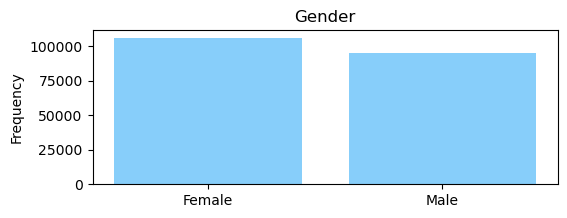

Gender: 
 Female    106201
Male       95364
Name: Gender, dtype: int64
-------------------------------------------



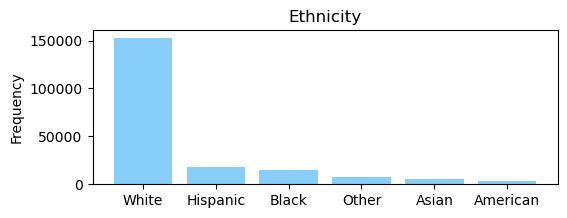

Ethnicity: 
 White       153126
Hispanic     17779
Black        14938
Other         7090
Asian         5218
American      3414
Name: Ethnicity, dtype: int64
-------------------------------------------



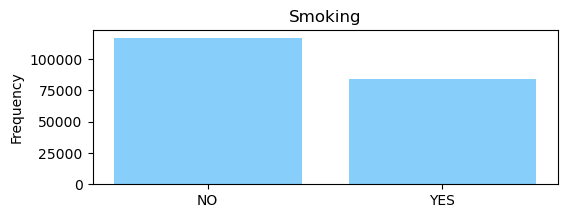

Smoking: 
 NO     117166
YES     84399
Name: Smoking, dtype: int64
-------------------------------------------



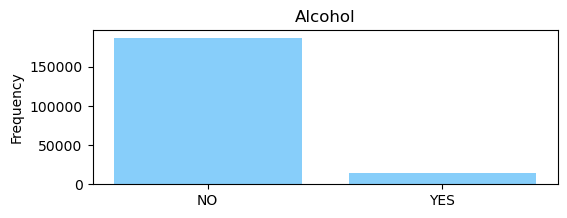

Alcohol: 
 NO     187381
YES     14184
Name: Alcohol, dtype: int64
-------------------------------------------



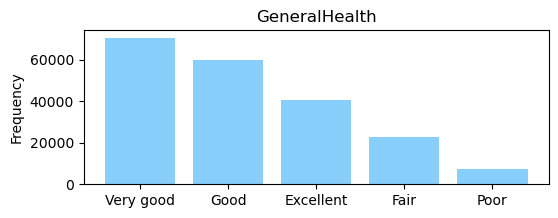

GeneralHealth: 
 Very good    70753
Good         60077
Excellent    40867
Fair         22581
Poor          7287
Name: GeneralHealth, dtype: int64
-------------------------------------------



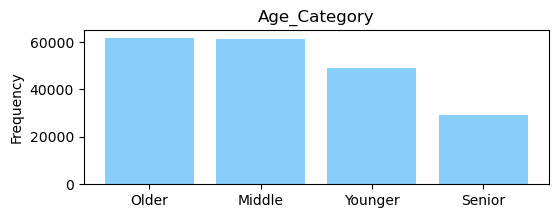

Age_Category: 
 Older      61893
Middle     61267
Younger    49035
Senior     29370
Name: Age_Category, dtype: int64
-------------------------------------------



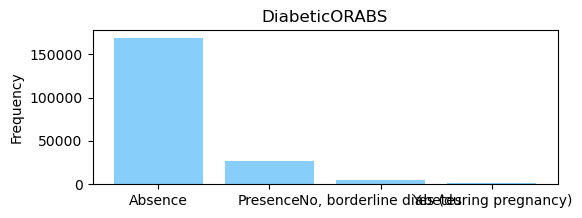

DiabeticORABS: 
 Absence                    169028
Presence                    26457
No, borderline diabetes      4428
Yes (during pregnancy)       1652
Name: DiabeticORABS, dtype: int64
-------------------------------------------



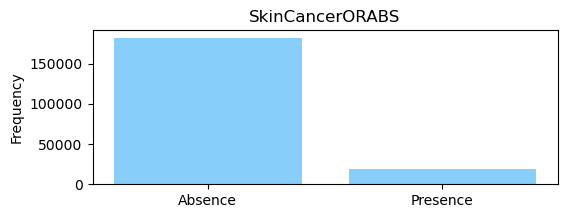

SkinCancerORABS: 
 Absence     182458
Presence     19107
Name: SkinCancerORABS, dtype: int64
-------------------------------------------



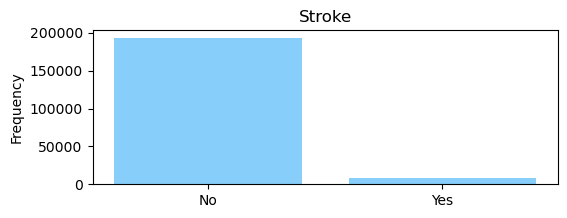

Stroke: 
 No     193684
Yes      7881
Name: Stroke, dtype: int64
-------------------------------------------



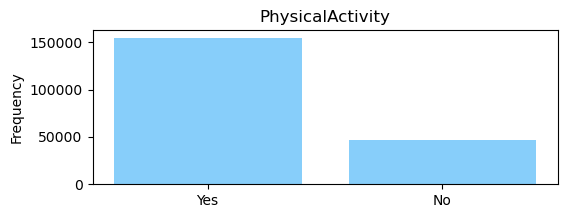

PhysicalActivity: 
 Yes    154885
No      46680
Name: PhysicalActivity, dtype: int64
-------------------------------------------



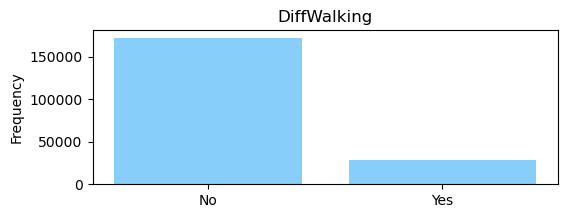

DiffWalking: 
 No     172602
Yes     28963
Name: DiffWalking, dtype: int64
-------------------------------------------



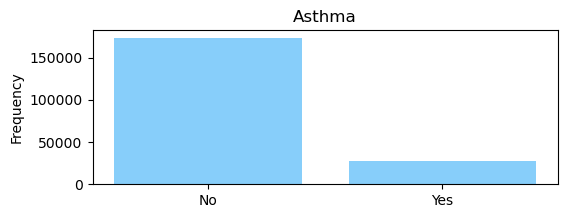

Asthma: 
 No     173807
Yes     27758
Name: Asthma, dtype: int64
-------------------------------------------



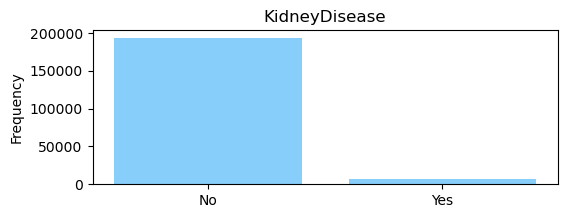

KidneyDisease: 
 No     193939
Yes      7626
Name: KidneyDisease, dtype: int64
-------------------------------------------



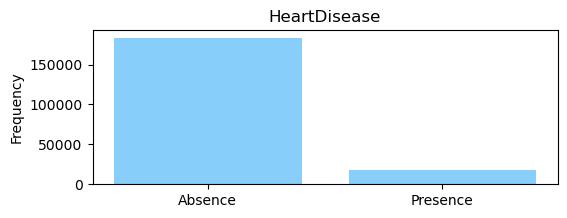

HeartDisease: 
 Absence     183762
Presence     17803
Name: HeartDisease, dtype: int64
-------------------------------------------



In [32]:
def frequencies(variable):
    """
            input: variable Ex:"GenHealth","AgeCategory" ...
            output: Bar plot & value count


    """
    # Get columns
    var=df_cat[variable]
    # Frequencies of categorical variables
    varValue=var.value_counts()
    #Visualization
    plt.figure(figsize=(6,2))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))


for i in df_cat:
    frequencies(i)
    print("-------------------------------------------\n")

- ### <u><span style="color:teal;">Informations about numerical data:</span>

#### <span style="color:teal;">To see only `numerical` variables:</span>

In [33]:
df_num=train.select_dtypes(include=["float64"])
df_num.head(10)

,BMI,PhysicalHealth,MentalHealth,TImEOFSLeeP
0,29.29,0.0,5.0,6.0
1,33.09,0.0,20.0,9.0
2,28.19,0.0,0.0,7.0
3,36.62,0.0,0.0,6.0
4,33.38,12.0,20.0,4.0
5,24.69,30.0,30.0,9.0
6,33.96,3.0,25.0,5.0
7,22.46,1.0,0.0,7.0
8,25.79,0.0,0.0,8.0
9,28.13,0.0,0.0,7.0


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,201565.0,28.398345,6.408026,12.02,24.03,27.37,31.57,94.85
PhysicalHealth,201565.0,3.474502,8.049476,0.00,0.00,0.00,2.00,30.00
MentalHealth,201565.0,4.008826,8.044429,0.00,0.00,0.00,4.00,30.00
TImEOFSLeeP,201565.0,7.095046,1.453296,1.00,6.00,7.00,8.00,24.00


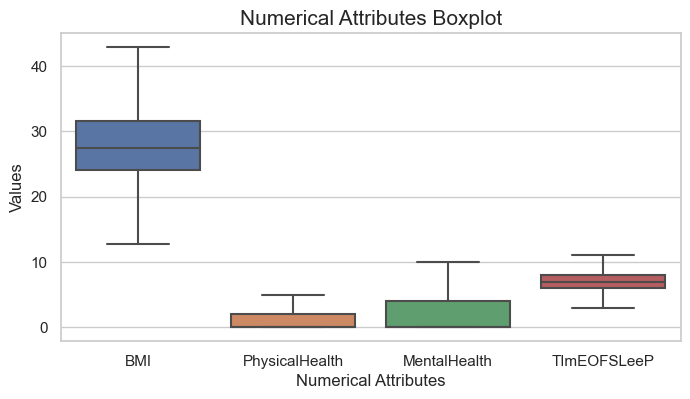

In [35]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

- ### <u><span style="color:teal;"> Outliers detection in `train` data set:</span>

In [36]:
def detect_outlier(col):
    IQR = train[col].quantile(.75) - train[col].quantile(.25)
    max_whiskers = train[col].quantile(.75) + (IQR*1.5)
    min_whiskers = train[col].quantile(.25) - (IQR*1.5)
    return train[(train[col]<max_whiskers) & (train[col]>min_whiskers)]

#### <span style="color:teal;"> `TImEOFSLeeP` column :</span>

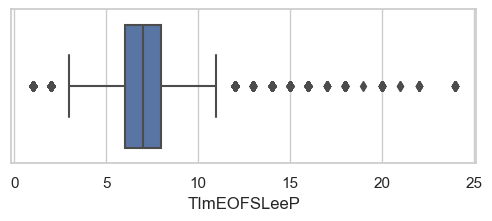

In [37]:
df_num_sleepTime=df_num["TImEOFSLeeP"]
plt.figure(figsize=(6,2))
sns.boxplot(x=df_num_sleepTime);

In [38]:
Q1=df_num_sleepTime.quantile(0.25)
Q3=df_num_sleepTime.quantile(0.75)
IQR=Q3-Q1
print("First Quartile: ",Q1)
print("Third Quartile: ",Q3)
print("Interquartile: ",IQR)

First Quartile:  6.0
Third Quartile:  8.0
Interquartile:  2.0


In [39]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit: ",lower_limit)
print("Upper Limi: ",upper_limit)

Lower Limit:  3.0
Upper Limi:  11.0


In [40]:
outliers = ((train["TImEOFSLeeP"]<lower_limit) | (train["TImEOFSLeeP"]>upper_limit))
outliers.sum()

3007

#### <span style="color:teal;">The outliers represents only `1.4 % ` of TImEOFSLeeP colomn so we can trim them. </span>

In [41]:
print("Old Shape: ", train.shape)
upper_array = np.where(train["TImEOFSLeeP"]>upper_limit)[0]
lower_array = np.where(train["TImEOFSLeeP"]<lower_limit)[0]

train.drop(index=upper_array, inplace=True)
train.drop(index=lower_array, inplace=True)
print("New Shape: ", train.shape)

Old Shape:  (201565, 18)
New Shape:  (198558, 18)


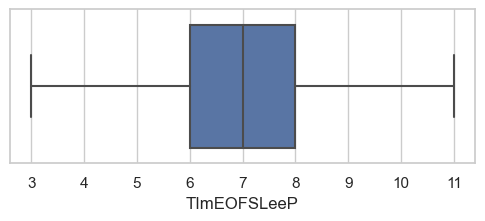

In [42]:

plt.figure(figsize=(6,2))
sns.boxplot(x=train["TImEOFSLeeP"]);

#### <span style="color:teal;">Now the `TImEOFSLeeP` column is free of outliers.</span>

### <span style="color:teal;"> `BMI` column :</span>

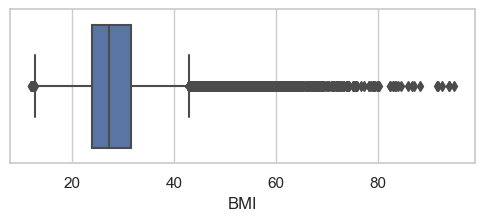

In [43]:

plt.figure(figsize=(6,2))
sns.boxplot(x=train["BMI"]);

In [44]:
train= detect_outlier ('BMI')

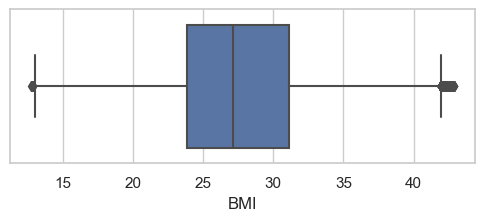

In [45]:
plt.figure(figsize=(6,2))
sns.boxplot(x=train["BMI"]);

#### <span style="color:teal;">Now the `BMI` column is free of outliers.</span>

# EDA

## some functions for visualizations

In [46]:
def pie_plot(column, title):
    ratios = round(train[column].value_counts(normalize=True)*100, 2)
    fig, ax = plt.subplots(figsize=(15,6))
    ax.pie(ratios.values,
        labels=ratios.index,
        autopct='%2.2f%%',
        startangle=90,
        explode=[.04]*len(ratios),
        shadow=False,
        colors=["#87CEFA","#FF0000"])
    plt.title(title)
    plt.show()

In [47]:
def bar_percent(column):
    grouped_data = train.groupby(column)["HeartDisease"].value_counts(normalize=True).reset_index(name='Percentage')
    grouped_data["Percentage"] = round(grouped_data["Percentage"]*100, 2)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=grouped_data, x=column,y="Percentage", hue="HeartDisease")

    for i in ax.containers:
        ax.bar_label(i, fmt='%.f%%')

    plt.title("Relationship between {} and Heart disease".format(column))
    plt.show()

##  Distribution of `HeartDisease` column:

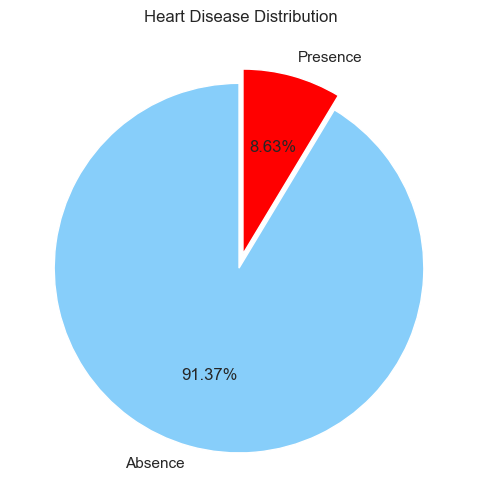

In [48]:
pie_plot("HeartDisease", "Heart Disease Distribution")

> We can notice that the majority of the people in our data do not suffer from heart disease

In [49]:
train.HeartDisease.value_counts()
# The Percentile of people who have Heart Disease
No_Value = train.HeartDisease.value_counts()[0]
Yes_Value = train.HeartDisease.value_counts()[1]
print("The number of People that have Heart Disease is ", Yes_Value , " and have Percentage Value {}%".format(((Yes_Value/len(train))*100).round(2)))
print("The number of People that have Heart Disease is ", No_Value , " and have Percentage Value {}%".format(((No_Value/len(train))*100).round(2)))

The number of People that have Heart Disease is  16602  and have Percentage Value 8.63%
The number of People that have Heart Disease is  175801  and have Percentage Value 91.37%


## The distribution of continuous columns:

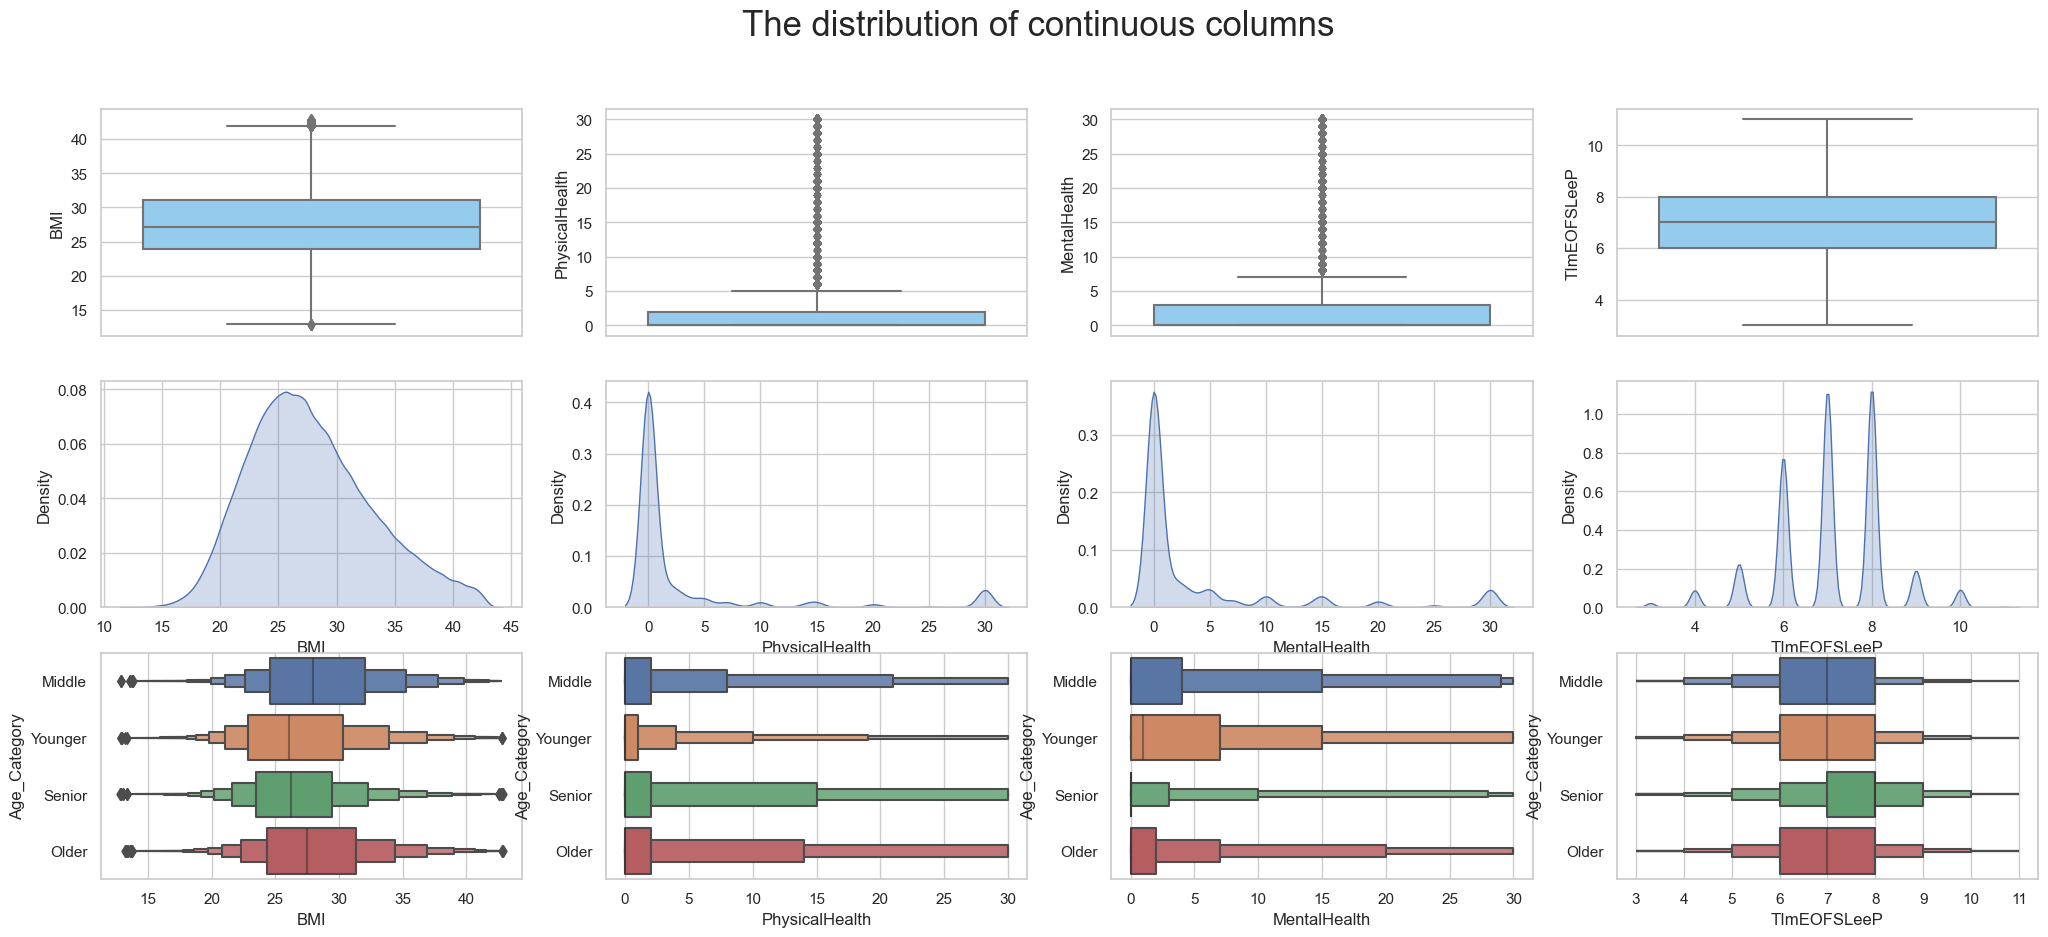

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(25,10))
for ax, column in enumerate(train.select_dtypes("float")):
    sns.boxplot(data=train, y=column, ax=axes[0, ax], color="#87CEFA")

for ax, column in enumerate(train.select_dtypes("float")):
    sns.kdeplot(data=train, x=column, ax=axes[1, ax], fill=True)

for ax, column in enumerate(train.select_dtypes("float")):
    sns.boxenplot(x=column, y="Age_Category", data=train, ax=axes[2, ax])

fig.suptitle("The distribution of continuous columns", fontsize=25)
plt.show()

> We can notice that `BMI` has normal distribution and other variables have Bimodal distribution

## What is the most gender that has heart disease?

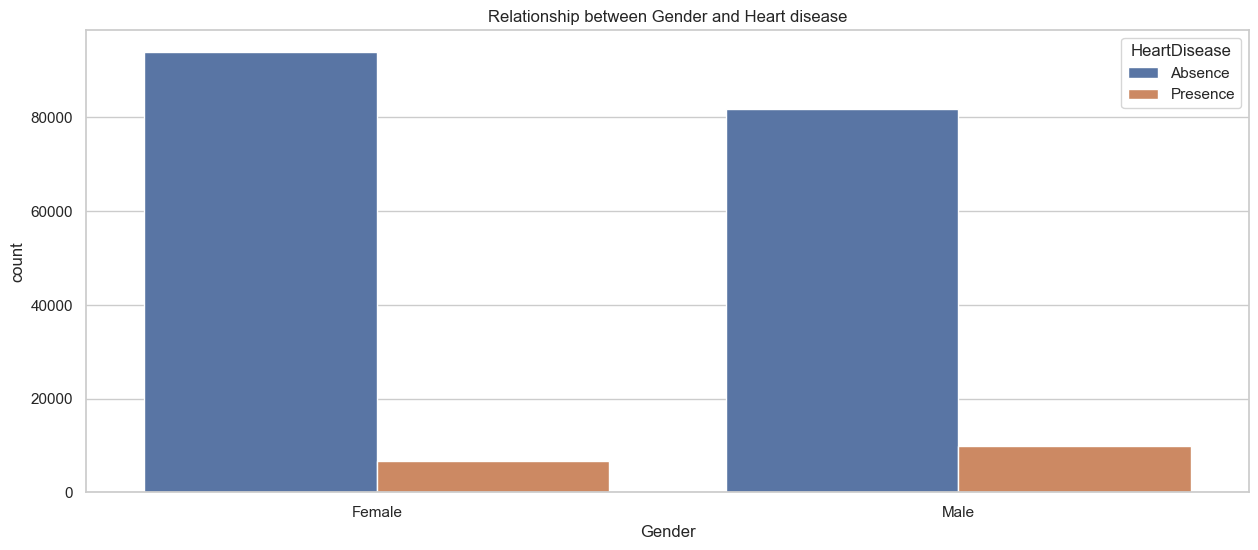

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x="Gender", hue="HeartDisease")
plt.title("Relationship between Gender and Heart disease")
plt.show()


In [52]:
female_with_heart_disease = len(train[(train['HeartDisease']=='Yes') & (train["Gender"]=='Female')])
num_female = len(train[train['Gender']=='Female'])
male_with_heart_disease = len(train[(train['HeartDisease']=='Yes') & (train['Gender']=='Male')])
num_male = len(train[train['Gender']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.0
Probability of Female to have Heart disease: 0.0


* Most heart disease patients are `Male` than Females
* More `Females` were tested than males
* Males are approximately `1.6` times more likely to have heart disease than females

## What is the most Ethnicity that has heart disease?

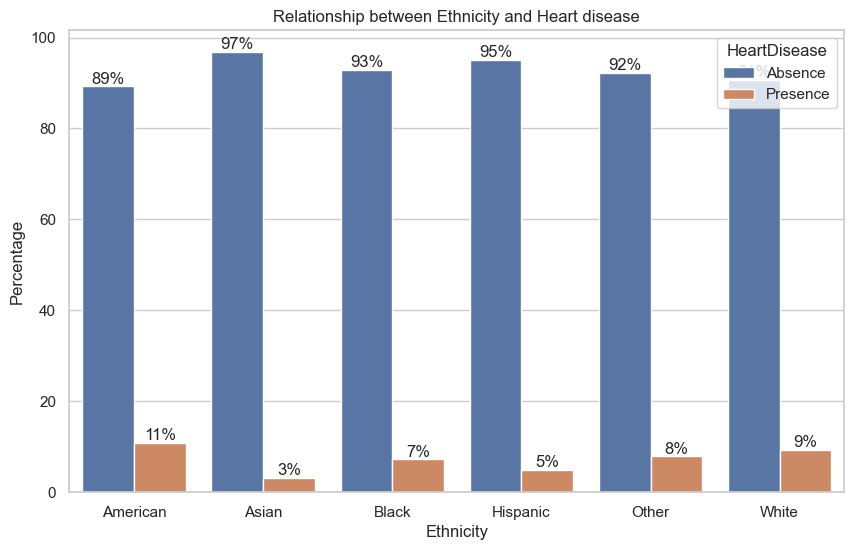

In [53]:
bar_percent("Ethnicity")

* We can notice that people with `white` and `american` Ethnicity are the most people with heart disease

## Is smoking lead to heart disease?

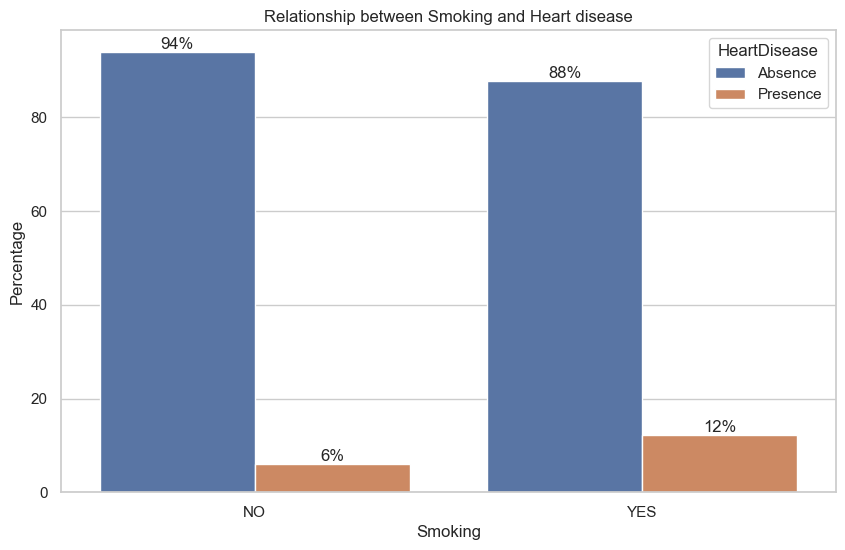

In [54]:
bar_percent("Smoking")

* Most heart disease patients `smoke`.

## Is alcohol lead to heart disease?

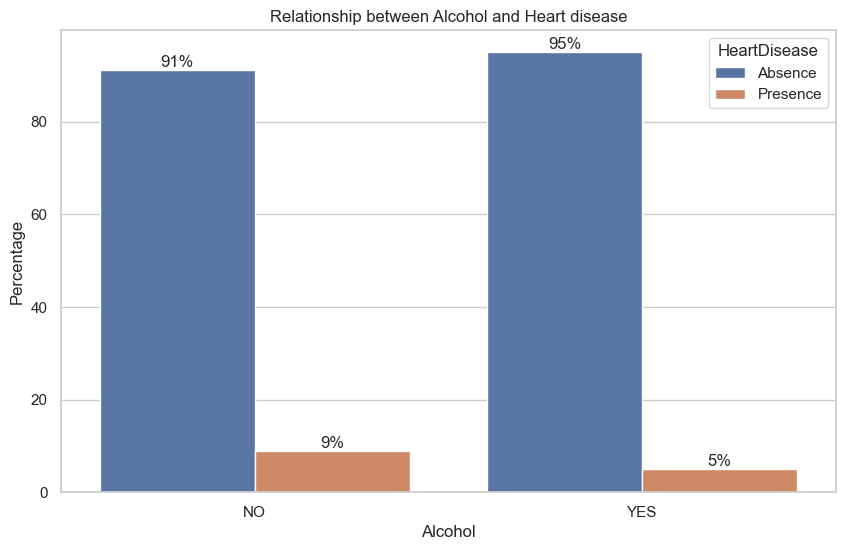

In [55]:
bar_percent("Alcohol")

> We can noitce that `drinking alcohol` does `not` lead to `heart disease`.

## What about the ralationship between GeneralHealth and HeartDisease?

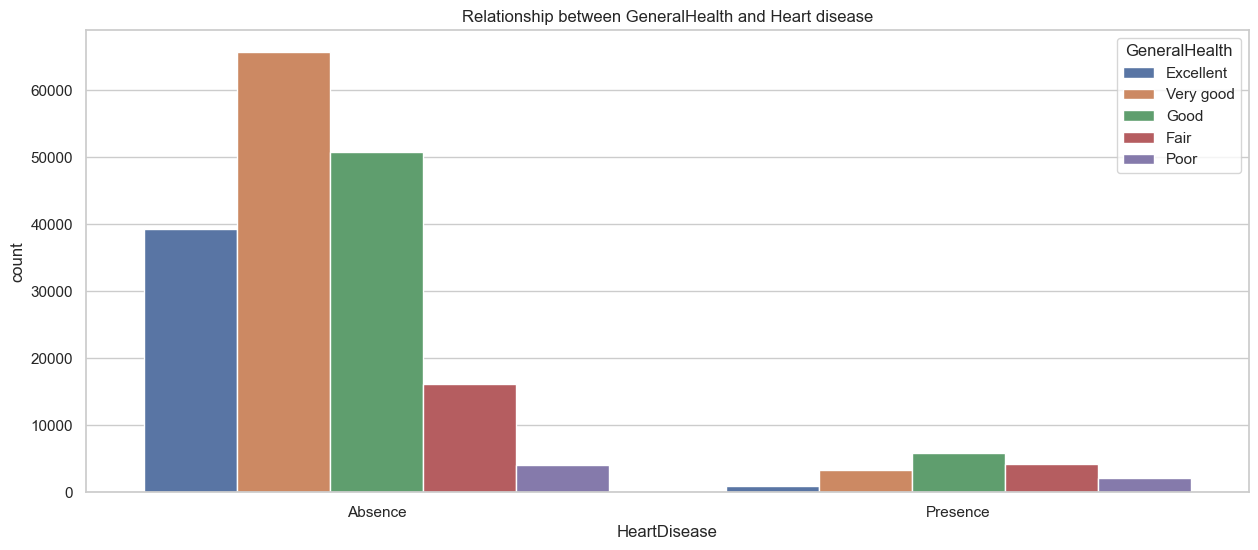

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x="HeartDisease", hue="GeneralHealth",
             hue_order=["Excellent", "Very good", "Good", "Fair","Poor"])
plt.title("Relationship between GeneralHealth and Heart disease")
plt.show()

* We can notice that most people that have `heart disease` said that their health is `good` and the majority of people that have not heart diseases said that their health is very good.

## Is there a particular Age Category have heart diseases more than another?

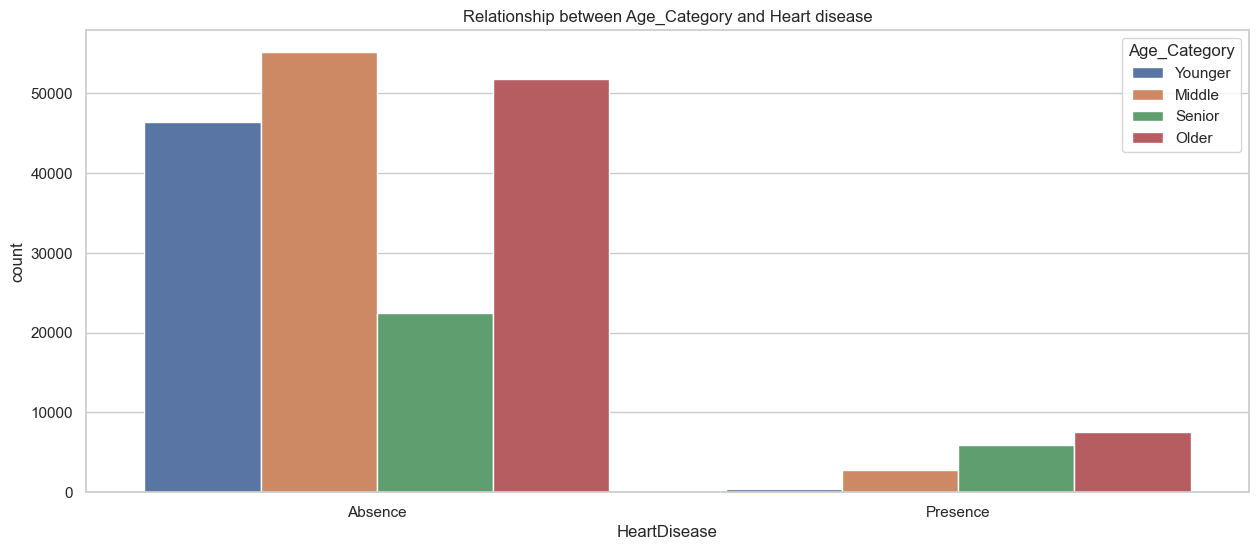

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x="HeartDisease", hue="Age_Category",
              hue_order=["Younger","Middle","Senior","Older"])
plt.title("Relationship between Age_Category and Heart disease")
plt.show()

> We can notice the strong relationship between `age` and `heart disease`. The rates of heart disease patients increases by `increasing` the age.

## What about the ralationship between BMI and HeartDisease?

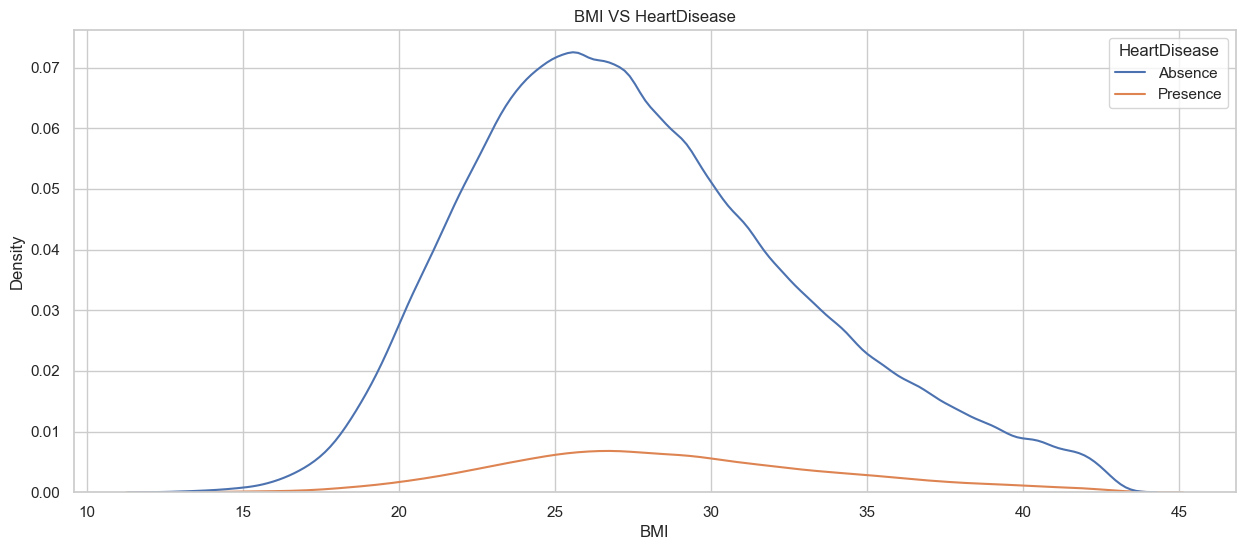

In [58]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x="BMI", hue="HeartDisease")
plt.title("BMI VS HeartDisease")
plt.show()

> We can notice that the two distributions have the `same range` of values on BMI, so we can say that the `BMI has no relationship with heart disease`

## What about the ralationship between DiabeticORABS and HeartDisease?

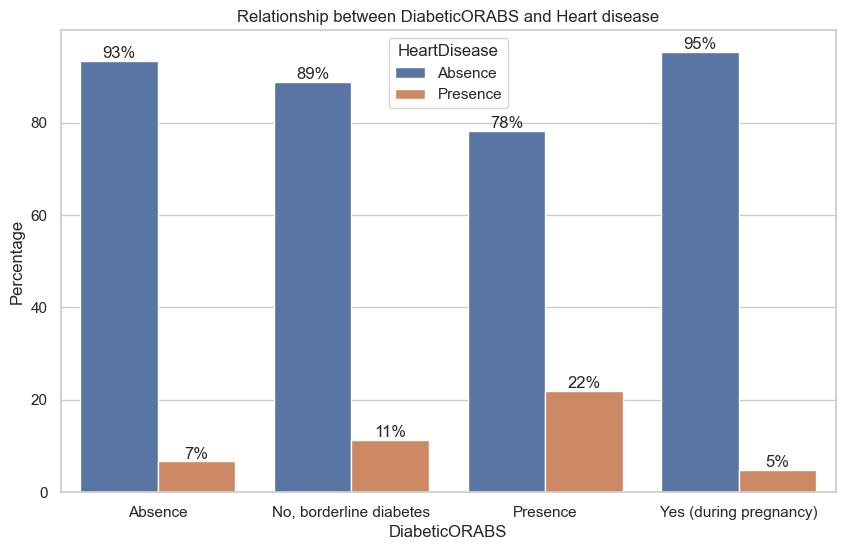

In [59]:
bar_percent("DiabeticORABS")

>  Diabetic is `correlated` with heart disease.

## What about the ralationship between SkinCancerORABS and HeartDisease?

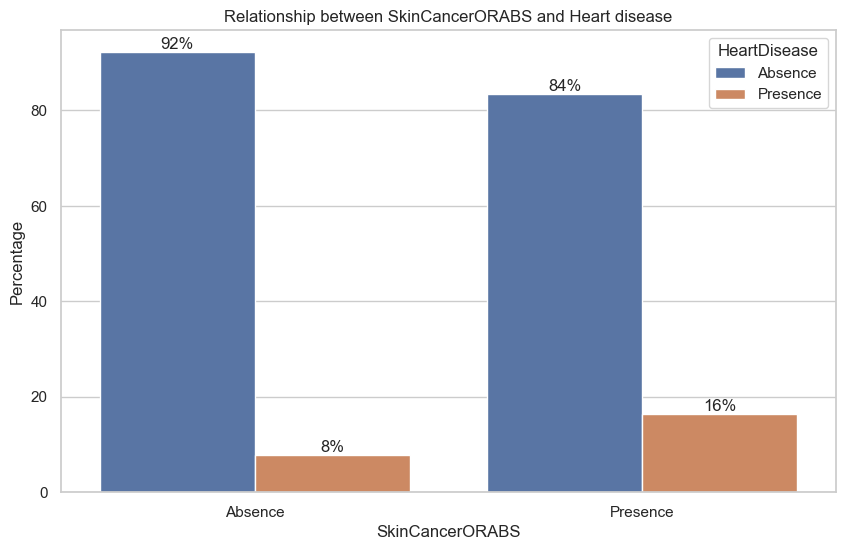

In [60]:
bar_percent("SkinCancerORABS")

> SkinCancer is somehow `correlated with heart disease

## What about the ralationship between Stroke and HeartDisease?

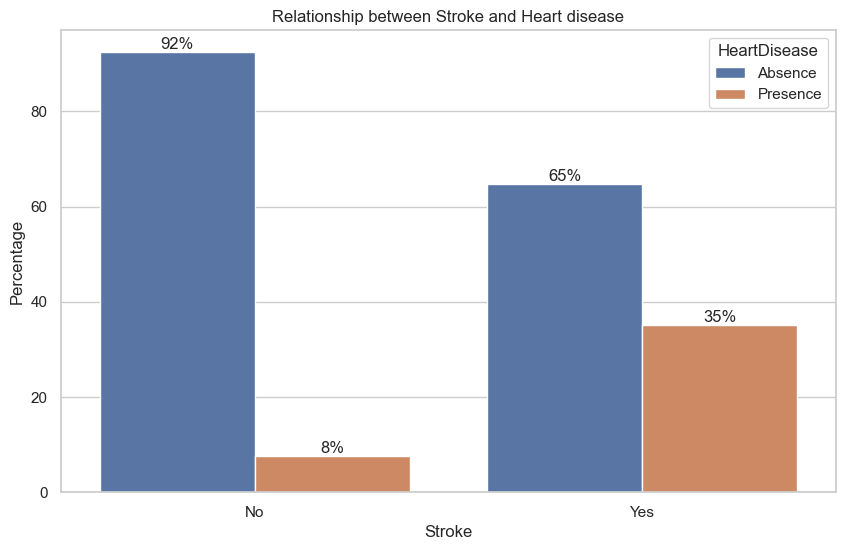

In [61]:
bar_percent("Stroke")

> There is a strong relationship between `stroke` and `heart disease`.

## Is PhysicalHealth correlated with heart disease?

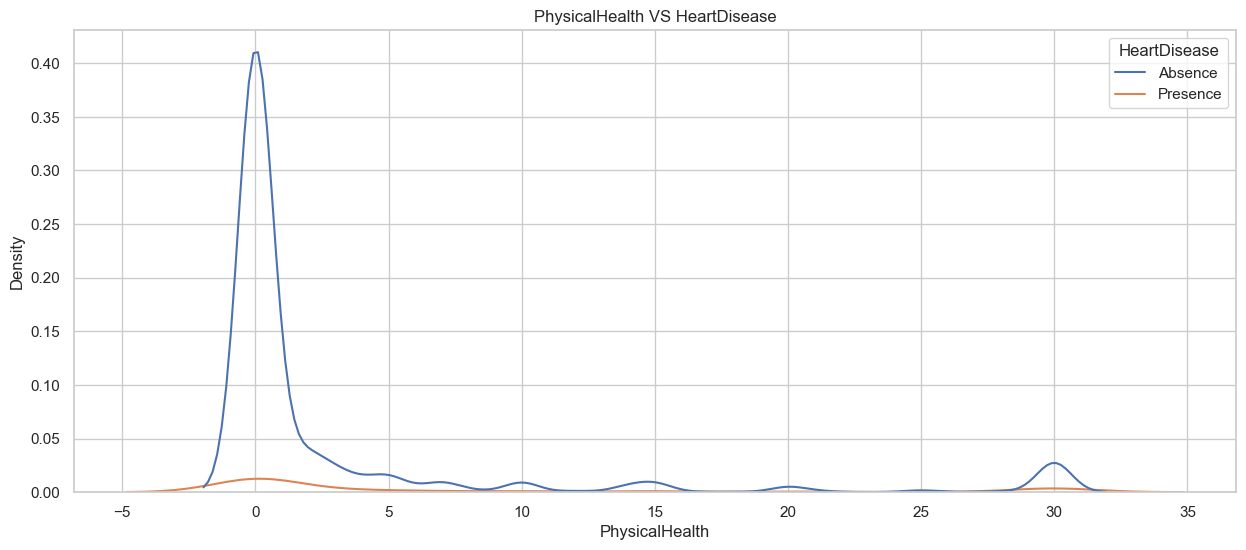

In [62]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x="PhysicalHealth", hue="HeartDisease")
plt.title("PhysicalHealth VS HeartDisease")
plt.show()

> The two distribution have the `same range` of values. There is `no relaionship between PhysicalHealth and heart disease`.

## Is MentalHealth correlated with heart disease?

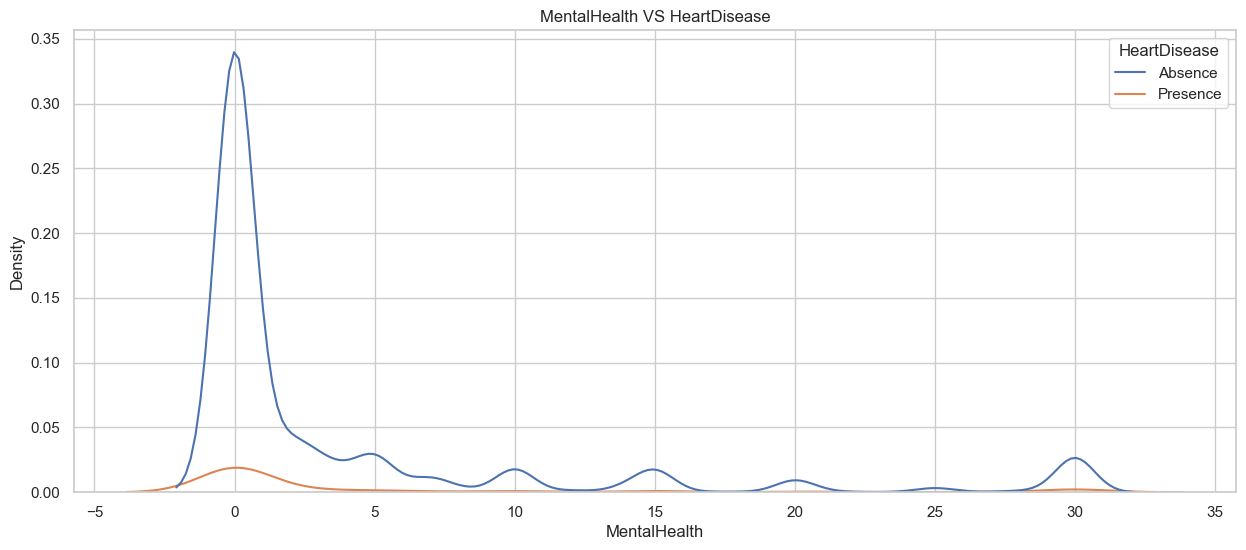

In [63]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x="MentalHealth", hue="HeartDisease")
plt.title("MentalHealth VS HeartDisease")
plt.show()

> The two distribution have the `same range` of values. There is` no relaionship between MentalHealth and heart disease`.

## What about the ralationship between PhysicalActivity and HeartDisease?

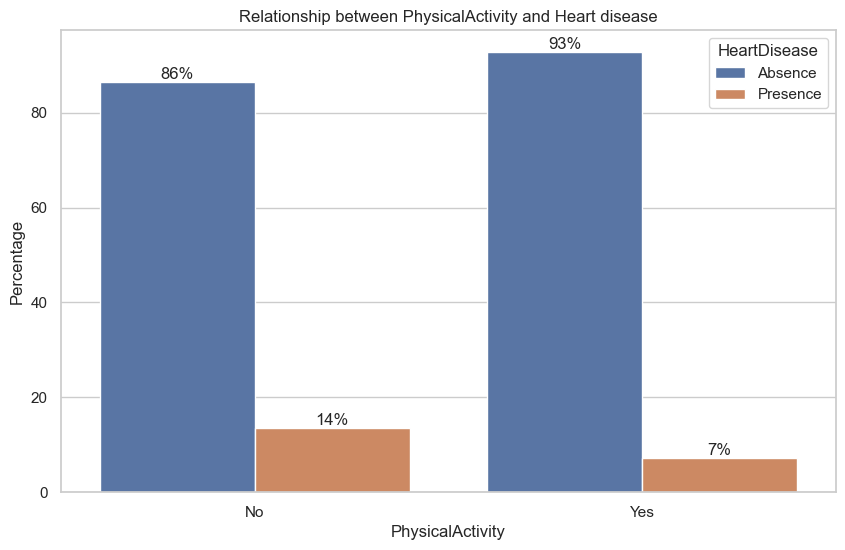

In [64]:
bar_percent("PhysicalActivity")

> People who do not do Physical Activity are `more susceptible` to have heart disease from the people who do Physical Activity.

## What about the ralationship between DiffWalking and HeartDisease?

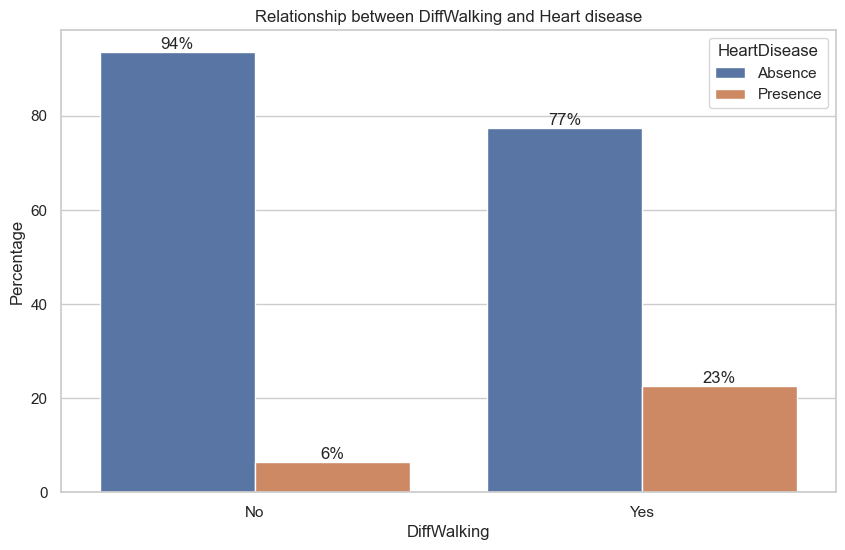

In [65]:
bar_percent("DiffWalking")

> people with `difficult` in walking and have `heart disease` are more than the people who do not have difficult in walking

## Is TImEOFSLeeP correlated with heart disease?

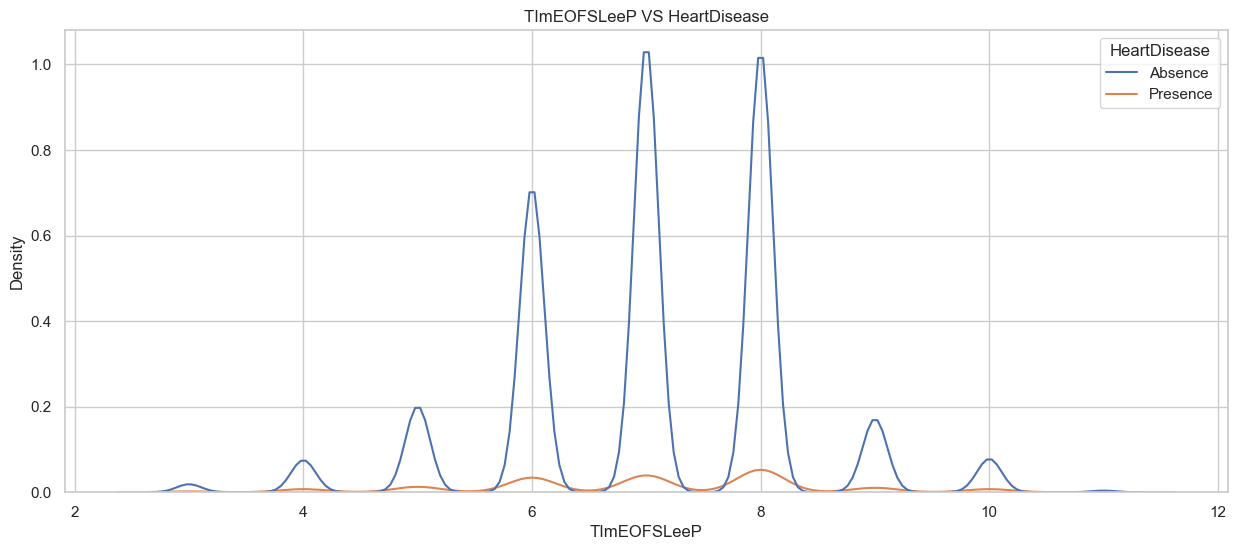

In [66]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x="TImEOFSLeeP", hue="HeartDisease")
plt.title("TImEOFSLeeP VS HeartDisease")
plt.show()

* The two distributions have the same range

## What about the ralationship between Asthma and HeartDisease?

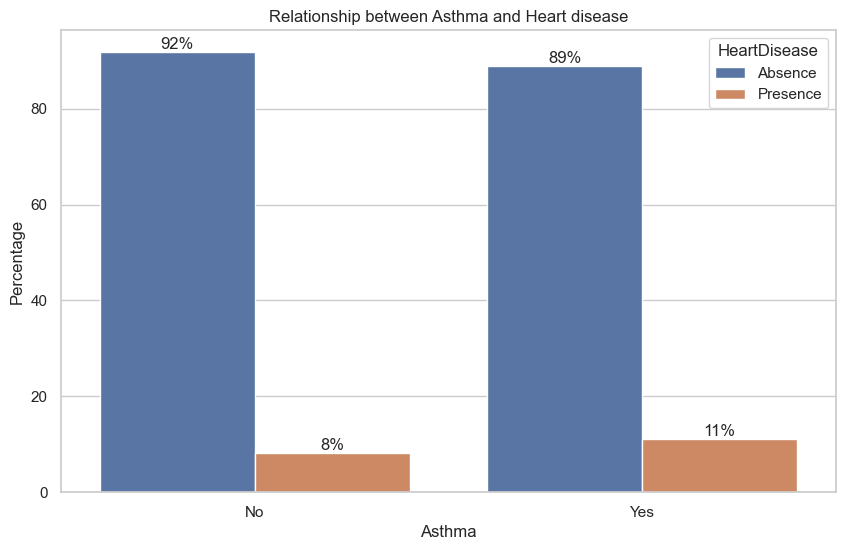

In [67]:
bar_percent("Asthma")

## What about the ralationship between KidneyDisease and HeartDisease?

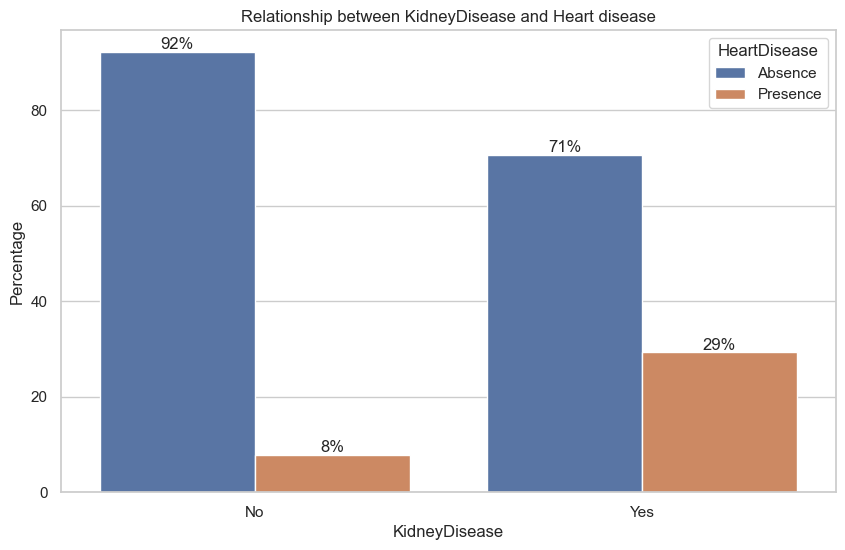

In [68]:
bar_percent("KidneyDisease")

> Most of the people who have `heart disease` also have `KidneyDisease`.

> ### we can see from above charts:

* number of people they `smoking` and have `heart disease` is more than they don't.
* number of people they `don't drink alcohol` and have `heart disease` is more than they don't.
* `males` have `heart disease` more than females.
* people who have `difficulty` walking can have `heart disease` more than don't.
* people who have `stroke` can have `heart disease` more than don't.
* The rates of `heart disease` patients increases by increasing the `age`.
* People who are `not physically` active can get `heart disease` more than others.

# Encoding Categorical columns :

In [69]:
for feature in train.columns:
    print(feature)
    print(train[feature].unique()  , len(train[feature].unique()) , 'unique in',feature )
    print('----------------------')

Gender
['Female' 'Male'] 2 unique in Gender
----------------------
Ethnicity
['Black' 'White' 'Other' 'Hispanic' 'Asian' 'American'] 6 unique in Ethnicity
----------------------
Smoking
['NO' 'YES'] 2 unique in Smoking
----------------------
Alcohol
['NO' 'YES'] 2 unique in Alcohol
----------------------
GeneralHealth
['Very good' 'Good' 'Fair' 'Excellent' 'Poor'] 5 unique in GeneralHealth
----------------------
Age_Category
['Middle' 'Younger' 'Senior' 'Older'] 4 unique in Age_Category
----------------------
BMI
[29.29 33.09 28.19 ... 18.   16.39 21.19] 2300 unique in BMI
----------------------
DiabeticORABS
['Absence' 'Presence' 'Yes (during pregnancy)' 'No, borderline diabetes'] 4 unique in DiabeticORABS
----------------------
SkinCancerORABS
['Absence' 'Presence'] 2 unique in SkinCancerORABS
----------------------
Stroke
['No' 'Yes'] 2 unique in Stroke
----------------------
PhysicalHealth
[ 0. 12. 30.  3.  1.  2.  5. 14.  4. 15. 10.  6. 20. 18.  7.  8. 25. 28.
 29. 21. 13. 17. 23.

* label multiple binary columns with `1` and `0` .

In [70]:
binary_columns1 = [ 'Smoking', 'Alcohol', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease']

for column in binary_columns1:
    train[column] = train[column].replace({'No':0 ,'NO':0 ,'YES':1, 'Yes':1})

In [71]:
binary_columns2 = [ 'HeartDisease', 'SkinCancerORABS', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease']

for column in binary_columns2:
    train[column] = train[column].replace({'Absence':0 , 'Presence':1})

* label the values in a column representing the gender of individuals, you can use the map function. as integers (e.g. `0 for female`, `1 for male`).

In [72]:
train['Gender'] = train['Gender'].replace({'Female':0 ,  'Male':1})

* Label the values in a column representing the `general health` status of individuals,values are represented as integers (e.g. `4` for `excellent` ,`3` for `Very Good` , `2` for `good` ,`1` for `fair`, `0` for `poor`)

In [73]:
train['GeneralHealth'] = train['GeneralHealth'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})

* label the values in a column representing whether individuals have `diabetes or not`, values are represented as integers ({`Absence:0`, `No, borderline diabetes:1`, `Yes (during pregnancy):2`, `YPresence:3`})

In [74]:
train['DiabeticORABS'] = train['DiabeticORABS'].replace({'Absence':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Presence':3})

* label the values in a column representing `PhysicalHealth` ,`MentalHealt` values are represented as integers ({`between 10 and 20 :1`, `between 20 and 25 : 2`, `between 25 and 30 :3`})

In [75]:
cols =['PhysicalHealth' ,'MentalHealth']

for col in cols:
        train.loc[ train[col] <=10 , col ] = 0
        train.loc[ (train[col] > 10) & (train[col] <=20 ) , col ] = 1
        train.loc[ (train[col] > 20) & (train[col] <=25 ) , col ] = 2
        train.loc[ (train[col] > 25) & (train[col] <=30 ) , col ] = 3

train[cols[0]].value_counts()

0.0    172301
3.0     11679
1.0      7275
2.0      1148
Name: PhysicalHealth, dtype: int64

* Label the values in a column representing the `Age_Category` status of individuals,values are represented as integers (e.g. `3` for `Older` ,`2` for `Senior` , `1` for `Middle` , `0` for `Younger`)

In [76]:
train['Age_Category'] = train['Age_Category'].map({'Younger':0, 'Middle':1, 'Senior':2, 'Older':3})

* Label the values in a column representing the `Ethnicity` status of individuals,values are represented as integers (e.g. `5` for `Others` ,`4` for `American` , `3` for `Asian` , `2` for `Hispanic`, `1` for `White` , `0` for `Black`)

In [77]:
train['Ethnicity'] = train['Ethnicity'].map({'Black':0, 'White':1, 'Hispanic':2, 'Asian':3, 'American':4, 'Other':5})

* label the values in a column representing the time individuals spend sleeping, representing the time individuals spend sleeping in hours, you can label it like this:
* labels = (`less than 6 hours`, `6-8 hours`, `more than 8 hours`)

In [78]:
col = 'TImEOFSLeeP'
train.loc[ (train[col] <= 6) , col ] = 0
train.loc[ (train[col] > 6) & (train[col] <= 8 ) , col ] = 1
train.loc[ (train[col] > 8 ) & (train[col] <=24), col ] = 2

* transform `BMI` Values to `categories`.

In [79]:

def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7

In [80]:
train["BMI"] = train["BMI"].apply(transform_bmi)
train["BMI"].value_counts(ascending= False)

4    70337
3    60071
5    38571
6    16027
7     4243
2     2185
1      568
0      401
Name: BMI, dtype: int64

In [81]:
train.head()

,Gender,Ethnicity,Smoking,Alcohol,GeneralHealth,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease,HeartDisease
0,0,0,0,0,3,1,4,0,0,0,0.0,0.0,1,0,0.0,0,0,0
1,0,1,1,1,3,1,5,0,0,0,0.0,1.0,1,0,2.0,0,0,0
2,1,5,0,0,2,0,4,0,0,0,0.0,0.0,1,0,1.0,0,0,0
3,1,1,0,0,2,1,6,0,0,0,0.0,0.0,0,0,0.0,0,0,0
4,1,1,1,0,2,1,5,0,0,1,1.0,1.0,0,0,0.0,1,0,0


## Features Preperation

In [1]:

import pandas as pd
num_colmns=['TImEOFSLeeP','BMI']
cat_columns=['Person_Story','Age_Category','DiabeticORABS','SkinCancerORABS','Stroke','PhysicalActivity','DiffWalking','Asthma','KidneyDisease']

def handle_cleaning( X):
    # Drop the 'ID' column
    X = X.drop(columns=['ID','PhysicalHealth','MentalHealth'])
    # Drop rows with all missing values
    X = X.dropna(how="all")
    # Drop duplicates
    X = X.drop_duplicates()

    def detect_outlier(col):
        IQR = X[col].quantile(.75) - X[col].quantile(.25)
        max_whiskers = X[col].quantile(.75) + (IQR*1.5)
        min_whiskers = X[col].quantile(.25) - (IQR*1.5)
        X.loc[(X[col]>max_whiskers) | (X[col]<min_whiskers),col]=X.loc[(X[col]<max_whiskers) & (X[col]>min_whiskers),col].median()
        return X

    X=detect_outlier('BMI')
    X=detect_outlier('TImEOFSLeeP')

    # impute with mode
    nan_columns = ['Stroke', 'PhysicalActivity', 'DiffWalking']

    df = X.groupby(['Age_Category']).agg(lambda x: x.value_counts().index[0])
    df = pd.DataFrame(df)

    for column in nan_columns:
        for i in df.index:
            X.loc[X['Age_Category'] == i, column] = X.loc[X['Age_Category'] == i, column].fillna(df.loc[i][column])

    # Initialize lists to store extracted information
    Gender = []
    Ethnicity = []
    Smoking = []
    Alcohol = []
    GeneralHealth = []

    for person in X["Person_Story"]:
        # Split the sentences
        sentences = str(person).split(".")

        # Extract information from the first sentence
        sentence1 = sentences[0].split()
        Gender.append(sentence1[7])
        Ethnicity.append(sentence1[10])

        # Extract information from the second sentence
        sentence2 = sentences[1].split()
        if sentence2[6] == "smoking":
            Smoking.append("YES")
        else:
            Smoking.append("NO")

        if sentence2[10] == "fondness":
            Alcohol.append("YES")
        else:
            Alcohol.append("NO")

        # Extract information from the third sentence
        sentence3 = sentences[2].split(" as ")
        GeneralHealth.append(sentence3[1].strip("'"))

    # Create a dataframe with the extracted features
    story_df = pd.DataFrame(
        zip(Gender, Ethnicity, Smoking, Alcohol, GeneralHealth),
        columns=["Gender", "Ethnicity", "Smoking", "Alcohol", "GeneralHealth"],
    )
    X.reset_index(drop=True,inplace=True)
    story_df.reset_index(drop=True,inplace=True)
    # Concatenate the extracted features dataframe with the original data
    X = pd.concat([story_df, X], axis=1)

    # Drop the "Person_Story" column
    X = X.drop(columns=["Person_Story"])

    return X

In [2]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
train =  pd.read_csv('IEEE_competition.csv')
cleaned_train=handle_cleaning(train)


In [3]:
scaler=StandardScaler()
cleaned_train.loc[:,num_colmns]=scaler.fit_transform(cleaned_train.loc[:,num_colmns])


In [4]:
categorical_columns=cleaned_train.select_dtypes(exclude='number').columns

encoder=OneHotEncoder(sparse=False)
cat_df=encoder.fit_transform(cleaned_train.loc[:,categorical_columns])
cat_df=pd.DataFrame(cat_df,columns=encoder.get_feature_names_out(categorical_columns))


In [5]:
col = 'TImEOFSLeeP'
cleaned_train.loc[ (cleaned_train[col] <= 6) , col ] = 0
cleaned_train.loc[ (cleaned_train[col] > 6) & (cleaned_train[col] <= 8 ) , col ] = 1
cleaned_train.loc[ (cleaned_train[col] > 8 ) & (cleaned_train[col] <=24), col ] = 2

In [6]:
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7

In [7]:
cleaned_train["BMI"] = cleaned_train["BMI"].apply(transform_bmi)
cleaned_train["BMI"].value_counts(ascending= False)

0    193735
Name: BMI, dtype: int64

## Training Candidate Models

### Split dataset into training and validation.

In [8]:
from sklearn.model_selection import train_test_split

final_df=pd.concat([cat_df,cleaned_train.loc[:,num_colmns]],axis=1)
x_train=final_df.drop(columns=['HeartDisease_Presence','HeartDisease_Absence'])
y_train=final_df.loc[:,'HeartDisease_Presence']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [9]:
x_train.head()

,Gender_Female,Gender_Male,Ethnicity_American,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other,Ethnicity_White,Smoking_NO,Smoking_YES,...,PhysicalActivity_No,PhysicalActivity_Yes,DiffWalking_No,DiffWalking_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,TImEOFSLeeP,BMI
35614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
114123,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
169601,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
18092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
174459,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0


### train LogisticRegression, RandomForest, DecisionTree classifiers

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import log_loss

models={
    'lg_reg':LogisticRegression(random_state=23),
    'rand_forest':RandomForestClassifier(random_state=23),
    'decision_tree':DecisionTreeClassifier(random_state=23)
}

for name,model in models.items():

    # Train the model on the training set
    models[name].fit(x_train, y_train)

    # Predict on the validation set
    y_pred =  models[name].predict(x_val)

    # Calculate the log loss on the validation set
    logloss = log_loss(y_val, y_pred)
    print("Log Loss for ",name," : ", logloss)

Log Loss for  lg_reg  :  3.1056164154116304
Log Loss for  rand_forest  :  3.331144768800324
Log Loss for  decision_tree  :  3.348972717438551


### Extracting Important Features from decission tree classifiers

In [11]:
# Obtain feature importances
importances = models['decision_tree'].feature_importances_

# Create a dictionary of feature importance scores
feature_importances = dict(zip(x_train.columns, importances))

# Sort the dictionary by importance scores (in descending order)
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 most important features
top_10_features = sorted_features[:10]
tree_features=list()
# Print the top 10 most important features
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")
    tree_features.append(feature)


DiffWalking_No: 0.12596645268093484
Age_Category_Senior: 0.07908403636161018
Age_Category_Older: 0.06088859705864425
Stroke_Yes: 0.0540823594669138
GeneralHealth_Fair: 0.039521244471833174
DiabeticORABS_Presence: 0.03896877730306118
GeneralHealth_Poor: 0.03576187547478142
Ethnicity_White: 0.03167896389270721
PhysicalActivity_Yes: 0.03146009953555738
Gender_Female: 0.03131253507501578


### Retrain using the new features

In [12]:
for name, model in models.items():
    # Train the model on the training set
    models[name].fit(x_train.loc[:,tree_features], y_train)

    # Predict on the validation set
    y_pred = models[name].predict(x_val.loc[:,tree_features])

    # Calculate the log loss on the validation set
    logloss = log_loss(y_val, y_pred)
    print("Log Loss for ", name, " : ", logloss)


Log Loss for  lg_reg  :  3.1608832935083875
Log Loss for  rand_forest  :  3.1858413278742925
Log Loss for  decision_tree  :  3.175143980872995


## Fine-tuning logistic Regression

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss

x_train=x_train.loc[:,tree_features]
x_val=x_val.loc[:,tree_features]
# Create an instance of Logistic Regression
logreg = LogisticRegression(random_state=23)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create an instance of GridSearchCV with log loss as the scoring metric
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='neg_log_loss')

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_val)

# Calculate the log loss
logloss = log_loss(y_val, y_pred)
print("Log Loss:", logloss)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Log Loss: 3.1608832935083875
Best Hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [14]:
param_grid = {
    'C': [0.8, 0.9, 1.1,1.2],
}

# Create an instance of GridSearchCV with log loss as the scoring metric
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='neg_log_loss')

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_val)

# Calculate the log loss
logloss = log_loss(y_val, y_pred)
print("Log Loss:", logloss)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Log Loss: 3.1608832935083875
Best Hyperparameters: {'C': 0.8}


## Test dataset

In [15]:

import pandas as pd
num_colmns=['TImEOFSLeeP','BMI']
cat_columns=['Person_Story','Age_Category','DiabeticORABS','SkinCancerORABS','Stroke','PhysicalActivity','DiffWalking','Asthma','KidneyDisease']

def handle_clean_test( X):
    # Drop the 'ID' column
    X = X.drop(columns=['ID','PhysicalHealth','MentalHealth'])

    def detect_outlier(col):
        IQR = X[col].quantile(.75) - X[col].quantile(.25)
        max_whiskers = X[col].quantile(.75) + (IQR*1.5)
        min_whiskers = X[col].quantile(.25) - (IQR*1.5)
        X.loc[(X[col]>max_whiskers) | (X[col]<min_whiskers),col]=X.loc[(X[col]<max_whiskers) & (X[col]>min_whiskers),col].median()
        return X

    X=detect_outlier('BMI')
    X=detect_outlier('TImEOFSLeeP')

    # impute with mode
    nan_columns = ['Stroke', 'PhysicalActivity', 'DiffWalking']

    df = X.groupby(['Age_Category']).agg(lambda x: x.value_counts().index[0])
    df = pd.DataFrame(df)

    for column in nan_columns:
        for i in df.index:
            X.loc[X['Age_Category'] == i, column] = X.loc[X['Age_Category'] == i, column].fillna(df.loc[i][column])

    # Initialize lists to store extracted information
    Gender = []
    Ethnicity = []
    Smoking = []
    Alcohol = []
    GeneralHealth = []

    for person in X["Person_Story"]:
        # Split the sentences
        sentences = str(person).split(".")

        # Extract information from the first sentence
        sentence1 = sentences[0].split()
        Gender.append(sentence1[7])
        Ethnicity.append(sentence1[10])

        # Extract information from the second sentence
        sentence2 = sentences[1].split()
        if sentence2[6] == "smoking":
            Smoking.append("YES")
        else:
            Smoking.append("NO")

        if sentence2[10] == "fondness":
            Alcohol.append("YES")
        else:
            Alcohol.append("NO")

        # Extract information from the third sentence
        sentence3 = sentences[2].split(" as ")
        GeneralHealth.append(sentence3[1].strip("'"))

    # Create a dataframe with the extracted features
    story_df = pd.DataFrame(
        zip(Gender, Ethnicity, Smoking, Alcohol, GeneralHealth),
        columns=["Gender", "Ethnicity", "Smoking", "Alcohol", "GeneralHealth"],
    )
    X.reset_index(drop=True,inplace=True)
    story_df.reset_index(drop=True,inplace=True)
    # Concatenate the extracted features dataframe with the original data
    X = pd.concat([story_df, X], axis=1)

    # Drop the "Person_Story" column
    X = X.drop(columns=["Person_Story"])

    return X

In [16]:
testing_1=pd.read_csv('test_data.csv')

cleaned_test=handle_clean_test(testing_1)

cleaned_test.loc[:,num_colmns]=scaler.transform(cleaned_test.loc[:,num_colmns])
categorical_columns=cleaned_test.select_dtypes(exclude='number').columns


cat_df=encoder.fit_transform(cleaned_test.loc[:,categorical_columns])
cat_df=pd.DataFrame(cat_df,columns=encoder.get_feature_names_out(categorical_columns))






In [17]:
col = 'TImEOFSLeeP'
cleaned_test.loc[ (cleaned_test[col] <= 6) , col ] = 0
cleaned_test.loc[ (cleaned_test[col] > 6) & (cleaned_test[col] <= 8 ) , col ] = 1
cleaned_test.loc[ (cleaned_test[col] > 8 ) & (cleaned_test[col] <=24), col ] = 2

In [18]:
cleaned_test["BMI"].apply(transform_bmi)
cleaned_test["BMI"].value_counts(ascending= False)

-0.138813    4525
-0.230680    1300
-0.075069     984
-0.078818     971
-0.646894     955
             ... 
-2.561102       1
 2.088493       1
-2.221757       1
 1.612284       1
 1.023586       1
Name: BMI, Length: 2115, dtype: int64

In [19]:
final_df=pd.concat([cat_df,cleaned_test.loc[:,num_colmns]],axis=1)

In [20]:
final_df.shape

(111766, 39)

In [21]:
testing_1.shape

(111766, 14)

In [22]:
x_test=final_df.loc[:,tree_features]

In [23]:
x_test.shape

(111766, 10)

In [24]:
y_test_pred=best_model.predict(x_test)

In [25]:
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
type(y_test_pred)

numpy.ndarray

In [32]:
y_test_df=pd.DataFrame(y_test_pred,columns=['HeartDisease'])
y_test_df=y_test_df.loc[:,'HeartDisease']

### Save predictions to csv file

In [28]:
y_test_df.to_csv('test_prediction_final.csv')